In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
#Any results you write to the current directory are saved as output.

In [2]:
#test_data = pd.read_csv("../input/cs-test.csv")
#train_data = pd.read_csv("../input/cs-training.csv")
test_data = pd.read_csv("cs-test.csv")
train_data = pd.read_csv("cs-training.csv")

In [3]:
test_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
47070,47071,NaN,0.377868,57,0,0.050700,8500.0,9,0,0,0,0.0
25776,25777,NaN,0.914738,45,0,0.178004,6100.0,11,0,0,2,0.0
25363,25364,NaN,0.063456,54,1,0.225025,11100.0,7,0,1,0,2.0
52027,52028,NaN,0.020693,54,0,22.000000,NaN,6,0,0,0,0.0
95752,95753,NaN,0.016411,49,0,0.416880,4300.0,15,1,2,0,0.0
93854,93855,NaN,0.240028,33,0,0.606889,7460.0,10,0,5,0,0.0
63899,63900,NaN,0.051360,57,0,0.193102,6291.0,5,0,1,0,0.0
75766,75767,NaN,0.810878,41,0,0.176256,3840.0,12,0,0,0,0.0
21018,21019,NaN,0.474702,32,0,0.485003,4300.0,10,0,2,0,0.0
92963,92964,NaN,0.814637,61,0,210.000000,NaN,3,2,0,1,0.0


In [4]:
#Let's take a look at the data
train_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
140773,140774,0,0.833457,43,2,0.159472,2802.0,11,0,0,0,3.0
8500,8501,0,0.026161,63,0,0.112985,11620.0,11,0,3,0,0.0
118389,118390,0,0.269171,41,1,0.549662,4580.0,14,0,1,0,0.0
55353,55354,0,0.000794,55,0,1966.000000,NaN,16,0,1,0,NaN
3181,3182,0,0.117294,42,0,0.131391,3500.0,8,0,1,0,2.0
128294,128295,1,0.994168,42,0,0.328307,2917.0,5,0,1,0,3.0
30263,30264,0,0.021421,63,0,0.011559,3200.0,7,0,0,0,0.0
55301,55302,0,0.533876,53,0,0.683985,5600.0,17,0,1,0,2.0
15190,15191,0,0.156549,76,0,0.069171,3353.0,5,0,1,0,0.0
55149,55150,0,0.051826,33,0,0.259118,8416.0,12,0,1,0,0.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

We have large null values for MonthlyIncome and NumberOfDependents, we will handle those values in a bit. Also, these features has inconsistent data types, we will change them to int64. Let's look at the summary statistics of the features.

In [6]:
train_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Age feature seems to have an outlier value 0. I assume that it is not recorded and we will impute it also with the age's median.  Meanwhile, The features NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse	and NumberOfTime30-59DaysPastDueNotWorse looks like giving the same information. Also, NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines. We will check their correlations to each other with the correlation matrix and do something to make use of these features. Let's go now and have a sneak peek on our test data.

In [7]:
test_data.sample(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
63240,63241,NaN,0.352990,50,0,0.112869,6635.0,12,0,0,0,1.0
28862,28863,NaN,0.180823,51,0,0.151078,4500.0,7,0,0,0,2.0
64864,64865,NaN,0.243944,57,0,0.387846,3833.0,7,0,1,0,1.0
48385,48386,NaN,1.024957,50,0,0.111041,15831.0,8,0,1,0,0.0
72324,72325,NaN,0.021819,33,0,0.127574,5000.0,7,0,0,0,0.0
43507,43508,NaN,0.455997,78,1,2847.000000,NaN,15,0,2,0,0.0
75158,75159,NaN,0.568080,26,0,0.196059,5125.0,3,1,0,0,1.0
45882,45883,NaN,0.546019,55,0,0.473983,9166.0,16,0,2,0,3.0
32691,32692,NaN,0.138006,64,0,0.282073,6001.0,8,0,1,0,0.0
28103,28104,NaN,0.655182,45,1,0.091148,7218.0,8,0,0,0,0.0


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [9]:
test_data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


Unlike our training dataset, our test set the min value of the age feature is 21. The MonthlyIncome and NumberOfDependents feature also has null values and we will handle those accordingly. Ofcourse SeriousDlqin2yrs has 0 values since it is our target class.

**Let's get our hands dirty!**

First, we will look at the distribution of our target class. SeriousDlqin2yrs to have some perspective about the problem.

/home/qjd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

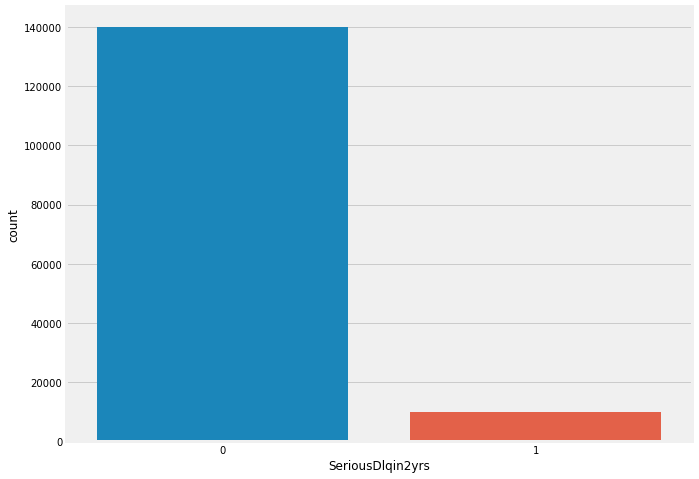

In [10]:
plt.figure(figsize=(10,8))
sns.countplot("SeriousDlqin2yrs", data=train_data)

There is clear problem here, we have an **unbalanced target class!!** we will check the event rate of financial distress (SeriousDlqin2yrs) in our dataset.

In [11]:
class_0 = train_data.SeriousDlqin2yrs.value_counts()[0]
class_1 = train_data.SeriousDlqin2yrs.value_counts()[1]
print("Total number of class_0: {}".format(class_0))
print("Total number of class_1: {}".format(class_1))
print("Event rate: {} %".format(class_1/(class_0+class_1) *100))

Total number of class_0: 139974
Total number of class_1: 10026
Event rate: 6.683999999999999 %


We have an event rate of **6.68%**, consequences of having this kind of target class is most likely that the minority class is being ignored by the algorithm and will predict the new instances to class_0 as it was the safest way to have a great accuracy.
There are guides on how to handle this problem and what I found most useful was the article of Jason Brownlee [here.](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) This competition uses an evaluation metric AUC so we will work inline with this evaluation metric (i.e using ROC Curve to compare models).
After reading the article I have concluded ways on how to tackle the problem.
1.  Since we have a lot of data, over 100,000 training data set, we will consider using Resampling (Under-sampling to be exact) this strategy will randomly delete some of the instances of the majority class (class_0) to make it balanced. using the [imbalanced-learn module](https://github.com/scikit-learn-contrib/imbalanced-learn)
2. Using penalized models (penalized RF, Logit)
3. Considering ensemble models.


Back to the training set.
age feature has a 0 value in it, so we will locate the entry and impute it with the age median.

In [12]:
train_data.loc[train_data["age"] < 18] #less than legal age

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


only one instance, let's impute it right away.

In [13]:
train_data.loc[train_data["age"] == 0, "age"] = train_data.age.median()

We're done with the age feature, now we will go and impute missing values for the MonthlyIncome feature. We will tackle this differently by bracketing ages with the working (18 to 60) and senior (60 and above). First, let's create a temporary dataframes for them and compute for each's median then impute the values accordingly.

In [14]:
age_working = train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60)]
age_senior = train_data.loc[(train_data["age"] >= 60)]

age_working_impute = age_working.MonthlyIncome.mean()
age_senior_impute = age_senior.MonthlyIncome.mean()

We will change the monthlyincome data type to int64 then fill those null values with 99999 and impute with the corresponding age's monthlyincome mean.

In [15]:
train_data["MonthlyIncome"] = np.absolute(train_data["MonthlyIncome"])

In [16]:
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].fillna(99999)

In [17]:
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

In [18]:
train_data.loc[((train_data["age"] >= 18) & (train_data["age"] < 60)) & (train_data["MonthlyIncome"] == 99999),\
               "MonthlyIncome"] = age_working_impute
train_data.loc[(train_data["age"] >= 60) & (train_data["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute

In [19]:
#check
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [20]:
train_data.loc[train_data["MonthlyIncome"] == 99999]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


We're done with the Monthly Income, now we will move to the NumberOfDependents feature.

In [21]:
train_data["NumberOfDependents"] = np.absolute(train_data["NumberOfDependents"])
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].fillna(0)
train_data["NumberOfDependents"] = train_data["NumberOfDependents"].astype('int64')

In [22]:
train_data.NumberOfDependents.value_counts()

0     90826
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
9         5
10        5
13        1
20        1
Name: NumberOfDependents, dtype: int64

I decided not to go through each of the numberofdependents feature and impute it by the mode. We will now take a look at the correlation of the features to the target variable.

<AxesSubplot:>

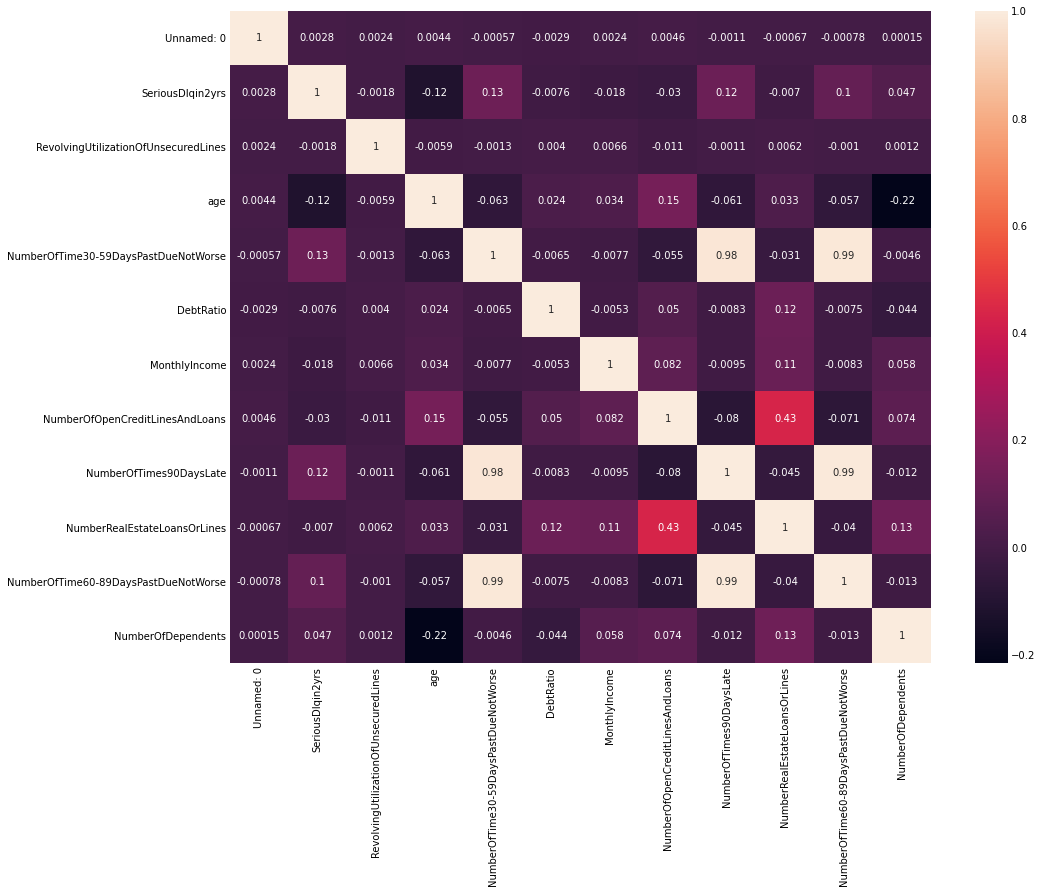

In [23]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

**Findings**: As expected, the NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse are highly correlated to each other and keeping all those features won't help the prediction power of algorithms(avoiding multicollinearity). I came up with 2 ways to handle this, drop the other 2 features and keep 1 or combine the three features and make a binary feature that classify if a borrower defaulted any loan/credit payment. Also, the NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines features are somehow correlated to each other but has different degree of correlation from our target class we can also handle this features the same way as we will handle the pastdue/late features.

We will go with feature engineering the pastdue/late features (because a default is a default!) and credit/loans features but providing a buffer since debts are everywhere!

In [24]:
train_data["CombinedDefaulted"] = (train_data["NumberOfTimes90DaysLate"] + train_data["NumberOfTime60-89DaysPastDueNotWorse"])\
                                        + train_data["NumberOfTime30-59DaysPastDueNotWorse"]

In [25]:
train_data.loc[(train_data["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

In [26]:
train_data["CombinedCreditLoans"] = train_data["NumberOfOpenCreditLinesAndLoans"] + \
                                        train_data["NumberRealEstateLoansOrLines"]

In [27]:
train_data.loc[(train_data["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
train_data.loc[(train_data["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

In [28]:
train_data.CombinedCreditLoans.value_counts()

1    111375
0     38625
Name: CombinedCreditLoans, dtype: int64

Next, we will create a binary feature WithDependents which is derived from the NumberOfDependents feature. Also, from the description of the data DebtRatio = Monthly debt payments / monthly gross income. we will extract MonthlyDebtPayments from this formula to get a new feature.

In [29]:
train_data["WithDependents"] = train_data["NumberOfDependents"]
train_data.loc[(train_data["WithDependents"] >= 1), "WithDependents"] = 1

In [30]:
train_data.WithDependents.value_counts()

0    90826
1    59174
Name: WithDependents, dtype: int64

In [31]:
train_data["MonthlyDebtPayments"] = train_data["DebtRatio"] * train_data["MonthlyIncome"]
train_data["MonthlyDebtPayments"] = np.absolute(train_data["MonthlyDebtPayments"])
train_data["MonthlyDebtPayments"] = train_data["MonthlyDebtPayments"].astype('int64')

In [32]:
train_data["age"] = train_data["age"].astype('int64')
train_data["MonthlyIncome"] = train_data["MonthlyIncome"].astype('int64')

Also, let's see if we can get a good predictor out of age feature. using senior and working temporary dataframes earlier.

In [33]:
train_data["age_map"] = train_data["age"]
train_data.loc[(train_data["age"] >= 18) & (train_data["age"] < 60), "age_map"] = 1
train_data.loc[(train_data["age"] >= 60), "age_map"] = 0 

In [34]:
#replacing those numbers to categorical features then get the dummy variables
train_data["age_map"] = train_data["age_map"].replace(0, "working")
train_data["age_map"] = train_data["age_map"].replace(1, "senior")

In [35]:
train_data = pd.concat([train_data, pd.get_dummies(train_data.age_map,prefix='is')], axis=1)

Now let's look at the correlation matrix to decide to retain or drop the engineered features (avoiding multicollinearity).

<AxesSubplot:>

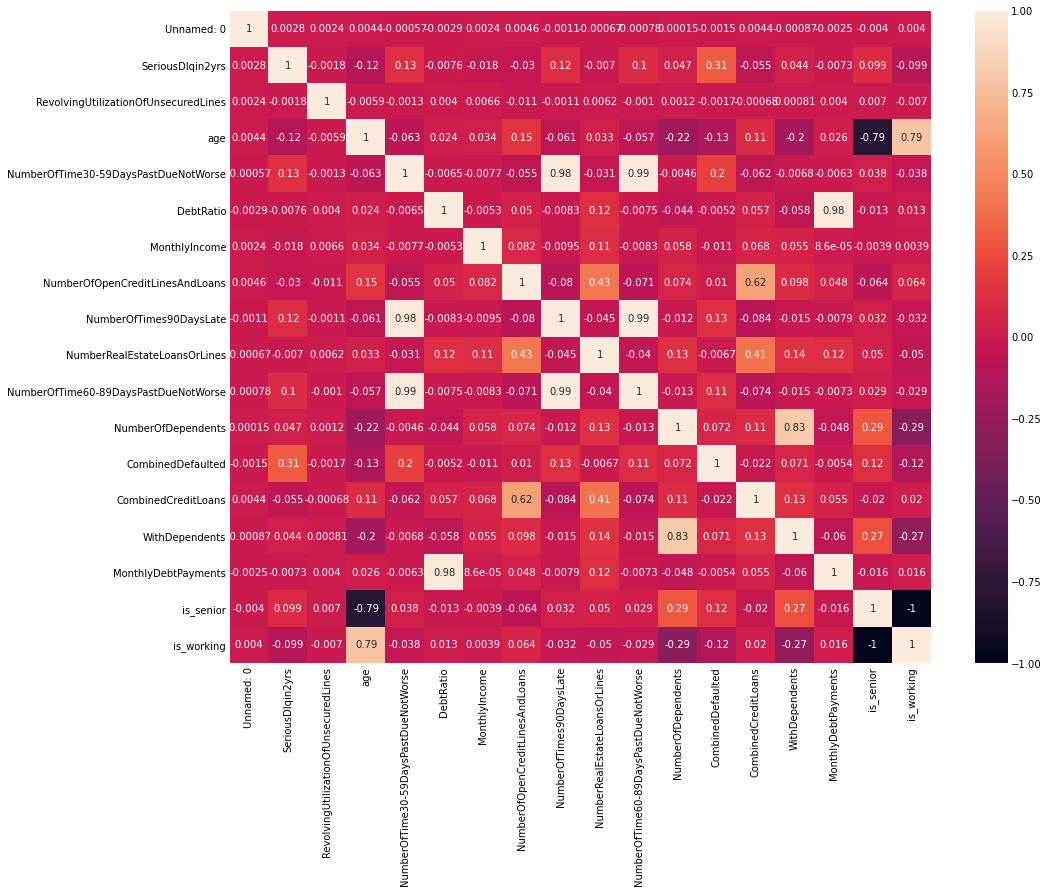

In [36]:
corr = train_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

Findings: 
* we will retain CombinedDefaulted feature as it clearly a good predictor of our target class than the three features it was derived from.
* we will retain NumberOfTime30-59DaysPastDueNotWorse and drop the other two features derived from CombinedDefaulted as it gives a more meaningful information on our target variable (also, it looks like this is the medium range of time a borrower defaulted a payment)
* we will drop the engineered is_working and is_senior feature since age feature outperforms them.
* we will drop also the WithDependents
* we will retain CombinedCreditLoans also since it outperforms the two features it came from.
* we will drop MonthlyDebtPayments


In [37]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans',
       'WithDependents', 'MonthlyDebtPayments', 'age_map', 'is_senior',
       'is_working'],
      dtype='object')

In [38]:
train_data.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse",\
                 "WithDependents","age_map","is_senior","is_working", "MonthlyDebtPayments"], axis=1, inplace=True)

In [39]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

<AxesSubplot:>

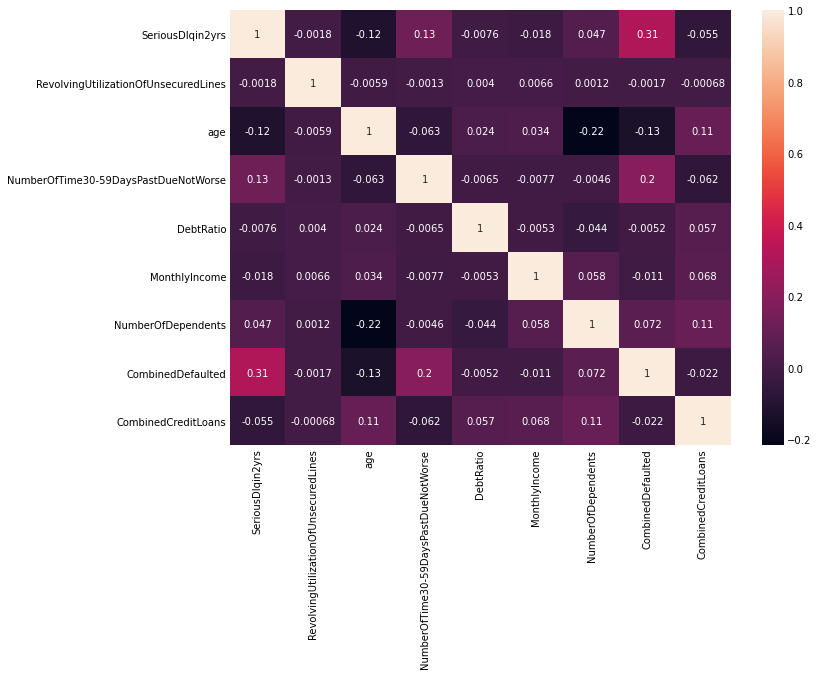

In [40]:
#now let's take a look at the filtered final features to be used in predicting the financial distress for the next two years
corr = train_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

Ta-da! we now have clean training dataset. now it's ready to apply algorithms to it but before that, since we have unbalanced dataset we know that this will not generalized well in the test set. So, we need to perform the undersampling or penalized kernels as we shortlisted those strategies earlier.

Now let's also clean the test set! Since we have concluded what features to retain and drop. we will skip some of the process.

In [41]:
def cleaned_dataset(dataset):
    dataset.loc[dataset["age"] <= 18, "age"] = dataset.age.median()
    
    age_working = dataset.loc[(dataset["age"] >= 18) & (dataset["age"] < 60)]
    age_senior = dataset.loc[(dataset["age"] >= 60)]

    age_working_impute = age_working.MonthlyIncome.mean()
    age_senior_impute = age_senior.MonthlyIncome.mean()

    dataset["MonthlyIncome"] = np.absolute(dataset["MonthlyIncome"])
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].fillna(99999)
    dataset["MonthlyIncome"] = dataset["MonthlyIncome"].astype('int64')

    dataset.loc[((dataset["age"] >= 18) & (dataset["age"] < 60)) & (dataset["MonthlyIncome"] == 99999),\
                   "MonthlyIncome"] = age_working_impute
    dataset.loc[(train_data["age"] >= 60) & (dataset["MonthlyIncome"] == 99999), "MonthlyIncome"] = age_senior_impute
    dataset["NumberOfDependents"] = np.absolute(dataset["NumberOfDependents"])
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].fillna(0)
    dataset["NumberOfDependents"] = dataset["NumberOfDependents"].astype('int64')

    dataset["CombinedDefaulted"] = (dataset["NumberOfTimes90DaysLate"] + dataset["NumberOfTime60-89DaysPastDueNotWorse"])\
                                            + dataset["NumberOfTime30-59DaysPastDueNotWorse"]

    dataset.loc[(dataset["CombinedDefaulted"] >= 1), "CombinedDefaulted"] = 1

    dataset["CombinedCreditLoans"] = dataset["NumberOfOpenCreditLinesAndLoans"] + \
                                            dataset["NumberRealEstateLoansOrLines"]
    dataset.loc[(dataset["CombinedCreditLoans"] <= 5), "CombinedCreditLoans"] = 0
    dataset.loc[(dataset["CombinedCreditLoans"] > 5), "CombinedCreditLoans"] = 1

    dataset.drop(["Unnamed: 0","NumberOfOpenCreditLinesAndLoans",\
                 "NumberOfTimes90DaysLate","NumberRealEstateLoansOrLines","NumberOfTime60-89DaysPastDueNotWorse"], axis=1, inplace=True)

cleaned_dataset(test_data)

In [42]:
test_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [43]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'CombinedDefaulted', 'CombinedCreditLoans'],
      dtype='object')

In [44]:
train_data.shape, test_data.shape

((150000, 9), (101503, 9))

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfDependents                    101503 non-null  int64  
 7   CombinedDefaulted                     101503 non-null  int64  
 8   CombinedCreditLoans                   101503 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 7.0 MB


In [46]:
#Let's split our predictors and the target variable in our datasets
X = train_data.drop("SeriousDlqin2yrs", axis=1).copy()
y = train_data.SeriousDlqin2yrs
X.shape, y.shape

((150000, 8), (150000,))

In [47]:
X_test = test_data.drop("SeriousDlqin2yrs", axis=1).copy()
y_test = test_data.SeriousDlqin2yrs
X_test.shape, y_test.shape

((101503, 8), (101503,))

In [48]:
#let's first try the penalized model Logit by providing the class_weight="balanced" parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict #to perform stratified sampling using cv param
from sklearn.metrics import roc_curve, roc_auc_score #AUC score
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42)
logit = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1.0, max_iter=500)
scaler = StandardScaler().fit(X_train)

Since we have a vast amount of data, we will use solver="saga" from logit and apply preprocessing of the input data using StandardScaler. class_weight="balanced" and a regularization param C to the default value of 1

In [49]:
X_train_scaled = scaler.transform(X_train) #scaling features!
X_val_scaled = scaler.transform(X_val)

In [50]:
logit.fit(X_train_scaled, y_train)
logit_scores_proba = logit.predict_proba(X_train_scaled)
logit_scores = logit_scores_proba[:,1]

In [51]:
#lets make a roc_curve visualization
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,10))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate")

AUC Score 0.8037465799063744


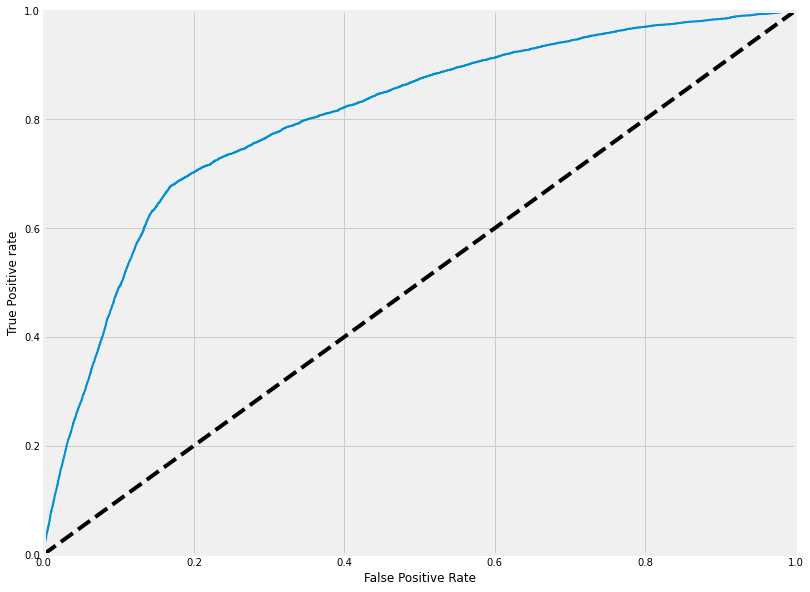

In [52]:
fpr_logit, tpr_logit, thresh_logit = roc_curve(y_train, logit_scores)
plot_roc_curve(fpr_logit,tpr_logit)
print("AUC Score {}".format(roc_auc_score(y_train,logit_scores)))

AUC Score 0.8011665203065631


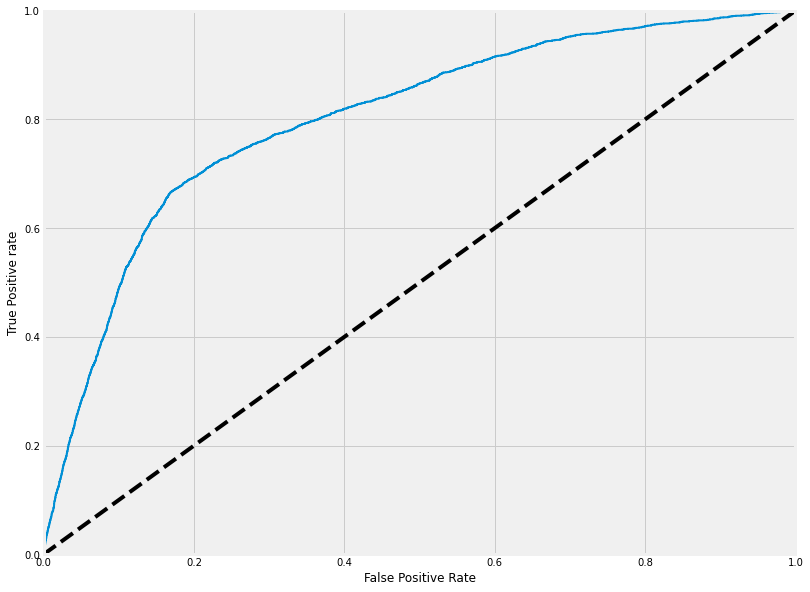

In [53]:
#validate with the validation set
logit_scores_proba_val = logit.predict_proba(X_val_scaled)
logit_scores_val = logit_scores_proba_val[:,1]
fpr_logit_val, tpr_logit_val, thresh_logit_val = roc_curve(y_val, logit_scores_val)
plot_roc_curve(fpr_logit_val,tpr_logit_val)
print("AUC Score {}".format(roc_auc_score(y_val,logit_scores_val)))

With using our first try with the logistic regression we got an AUC score of .80, not bad! let's try tuning the parameters to see if we can improve our score. we will try setting a different regularization factor, let's tighten it by 0.1 and 10. and making max_iteration to 1000. Our validation set score is not that far away from our training score and that's a good thing!

In [54]:
logit_C_low = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=0.001, max_iter=1000)
logit_C_low.fit(X_train_scaled, y_train)
logit_C_low_scores_proba = logit_C_low.predict_proba(X_train_scaled)
logit_C_low_scores = logit_C_low_scores_proba[:,1]
fpr_logit_C_low, tpr_logit_C_low, thresh_logit_C_low = roc_curve(y_train, logit_C_low_scores)
#plot_roc_curve(fpr_logit_C_low,tpr_logit_C_low)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_low_scores)))

AUC Score 0.8022986302726433


In [55]:
logit_C_high = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
logit_C_high.fit(X_train_scaled, y_train)
logit_C_high_scores_proba = logit_C_high.predict_proba(X_train_scaled)
logit_C_high_scores = logit_C_high_scores_proba[:,1]
fpr_logit_C_high, tpr_logit_C_high, thresh_logit_C_high = roc_curve(y_train, logit_C_high_scores)
print("AUC Score {}".format(roc_auc_score(y_train,logit_C_high_scores)))

AUC Score 0.8037479212822443


Lets visualize all of them at once!

Text(0, 0.5, 'True Positive rate')

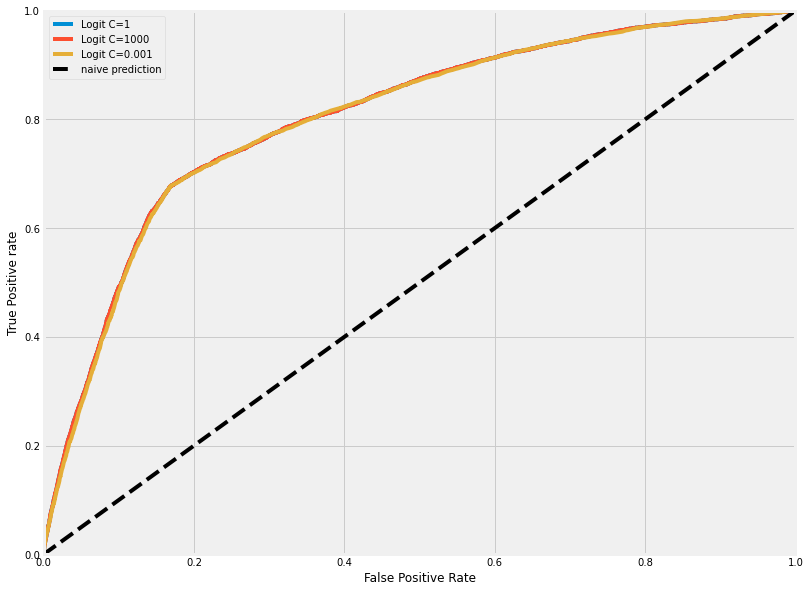

In [56]:
#lets make a roc_curve visualization
plt.figure(figsize=(12,10))
plt.plot(fpr_logit, tpr_logit, label="Logit C=1")
plt.plot(fpr_logit_C_high, tpr_logit_C_high , label="Logit C=1000")
plt.plot(fpr_logit_C_low, tpr_logit_C_low , label="Logit C=0.001")
plt.plot([0,1],[0,1], "k--", label="naive prediction")
plt.axis([0,1,0,1])
plt.legend(loc="best")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

Adjusting the C parameter don't mean much for our classifier to improve it's score. Let's try our second option which is to implement undersampling of our dataset to make the target variable balanced.

In [57]:
#Random Sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print("Original dataset shape {}".format(Counter(y)))

Original dataset shape Counter({0: 139974, 1: 10026})


In [59]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X,y)
print("Resampled dataset shape {}".format(Counter(y_resampled)))

Resampled dataset shape Counter({0: 10026, 1: 10026})


From here, we dropped most of the majority class ended up on a 50/50 ratio. the disadvantage of this strategy is that have lost most of the information from the majority class. advantage are our dataset will have a faster training and we solved the unbalanced dataset problem. let's give it a try!

In [61]:
X_resampled.shape, y_resampled.shape

((20052, 8), (20052,))

In [62]:
from sklearn.model_selection import train_test_split
X_train_rus, X_val_rus, y_train_rus, y_val_rus = train_test_split(X_resampled, y_resampled, random_state=42)
X_train_rus.shape, y_train_rus.shape

((15039, 8), (15039,))

In [63]:
scaler = StandardScaler().fit(X_train_rus)
X_train_rus_scaled = scaler.transform(X_train_rus)
X_val_rus_scaled = scaler.transform(X_val_rus)

AUC Score 0.8026716117914563


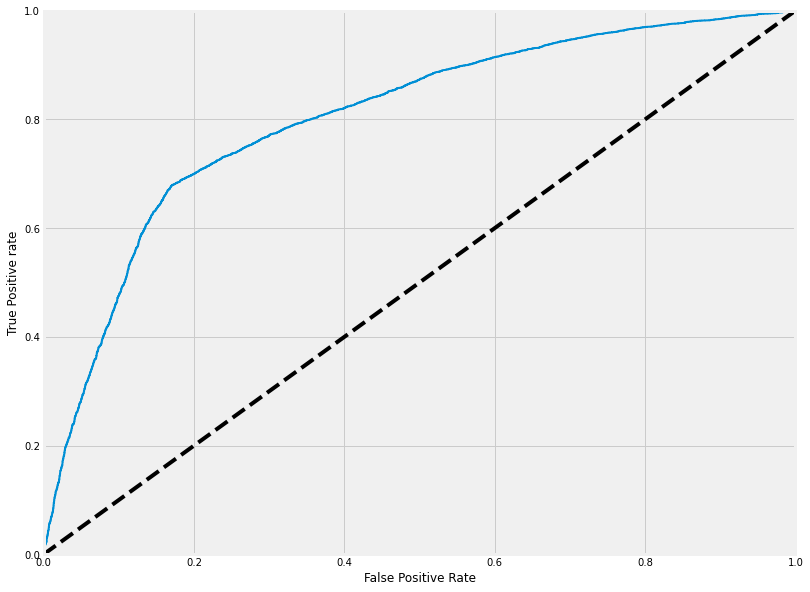

In [64]:
logit_resampled = LogisticRegression(random_state=42, solver="saga", penalty="l1", C=1.0, max_iter=500)
logit_resampled.fit(X_train_rus_scaled, y_train_rus)
logit_resampled_proba_res = logit_resampled.predict_proba(X_train_rus_scaled)
logit_resampled_scores = logit_resampled_proba_res[:,1]
fpr_logit_resampled, tpr_logit_resampled, thresh_logit_resampled = roc_curve(y_train_rus, logit_resampled_scores)
plot_roc_curve(fpr_logit_resampled,tpr_logit_resampled)
print("AUC Score {}".format(roc_auc_score(y_train_rus, logit_resampled_scores)))

Our score doesn't improve that much using the undersampling method. One reason of this would be that the logisticregression model can't handle this vast amount of data or we have reached its limitation of predictive power on this type of dataset. Let's try other complex models!

One way to improve our score  is to use ensembling models.  First, we will use RandomForests and will try GradientBoostingClassifier and compare their scores.

AUC Score 0.8526833850127096


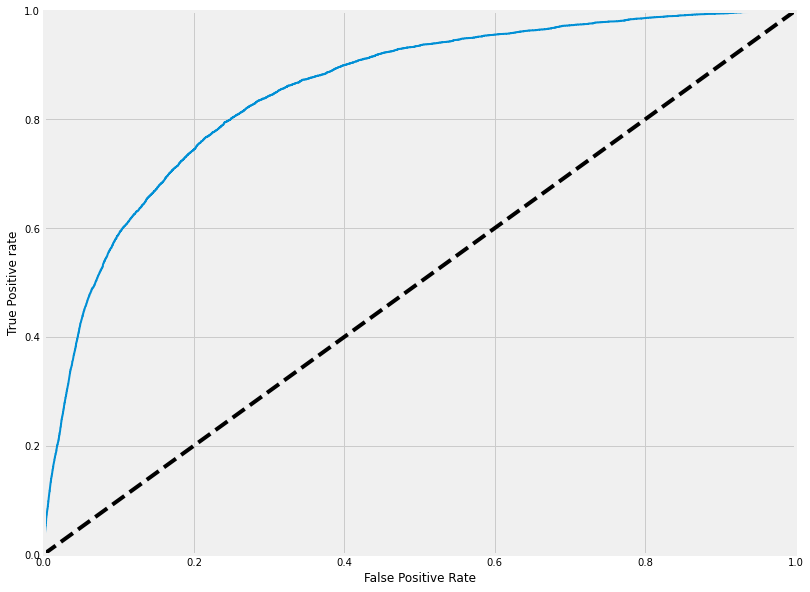

In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X_train,y_train) #Using the original dataset, not the resampled
y_scores_proba = forest.predict_proba(X_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_scores)
plot_roc_curve(fpr,tpr)
print("AUC Score {}".format(roc_auc_score(y_train,y_scores))) #max_depth=5 .8525 #7 .864 cross .85 #10 .89 cross .85 #9 .88 cross .853 #12 .92 cross .84 Overfit!

AUC Score 0.8489658267182891


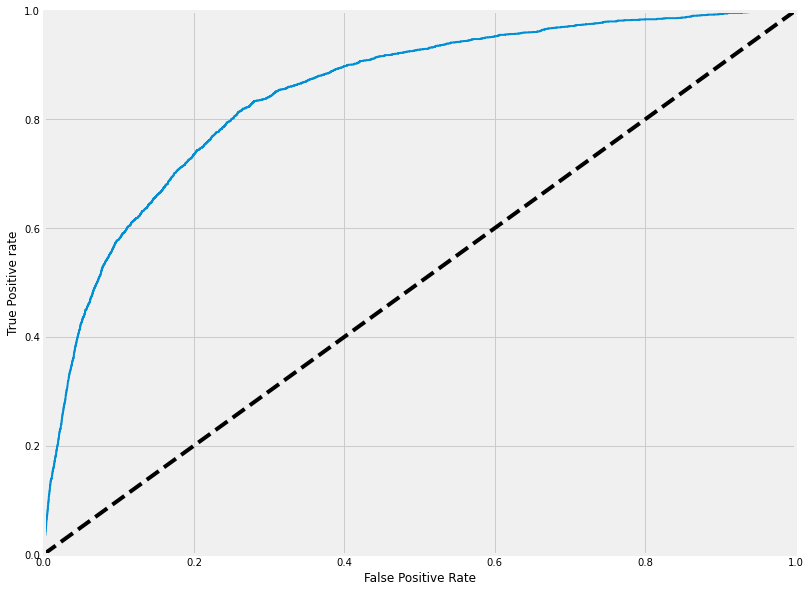

In [66]:
#Let's cross validate
y_val_proba = forest.predict_proba(X_val)
y_scores_val = y_val_proba[:,1]
fpr_val, tpr_val, thresh_val = roc_curve(y_val, y_scores_val)
plot_roc_curve(fpr_val,tpr_val)
print("AUC Score {}".format(roc_auc_score(y_val,y_scores_val)))

Let's see how the random forest classifier treat each of the features, here, the randomforest gives a huge importance for the CombinedDefaulted feature and the RevolvingUtilizationOfUnsecuredLines and almost disgregard the other features in its predictions.

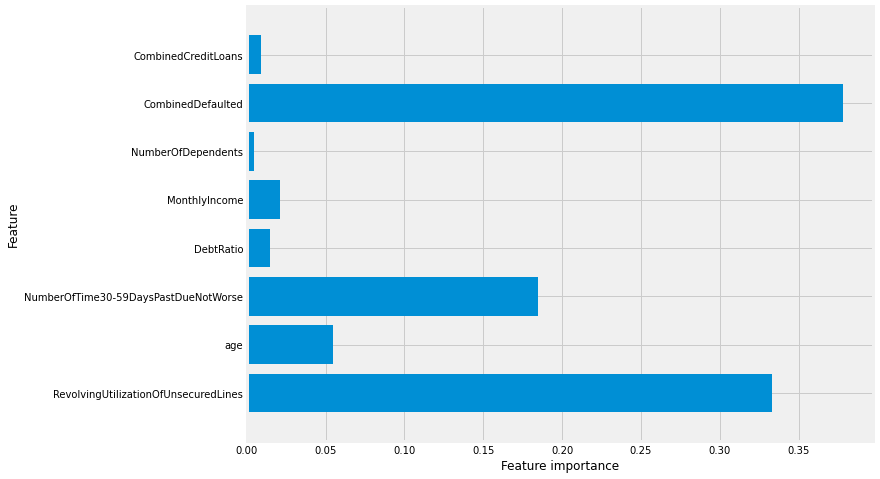

In [67]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

Tuning the max_depth param of randomforest with class_weight gave us a good score of .87 in the training set and .85 in the validation set. 
Here are the summary of the param tuninng 
#7 .864 cross .85 #10 .89 cross .85 #9 .88 cross .853 #12 .92 cross .84 Overfit!

Now Let's try GradientBoostingClassifier!

AUC Score 0.9326773558625726


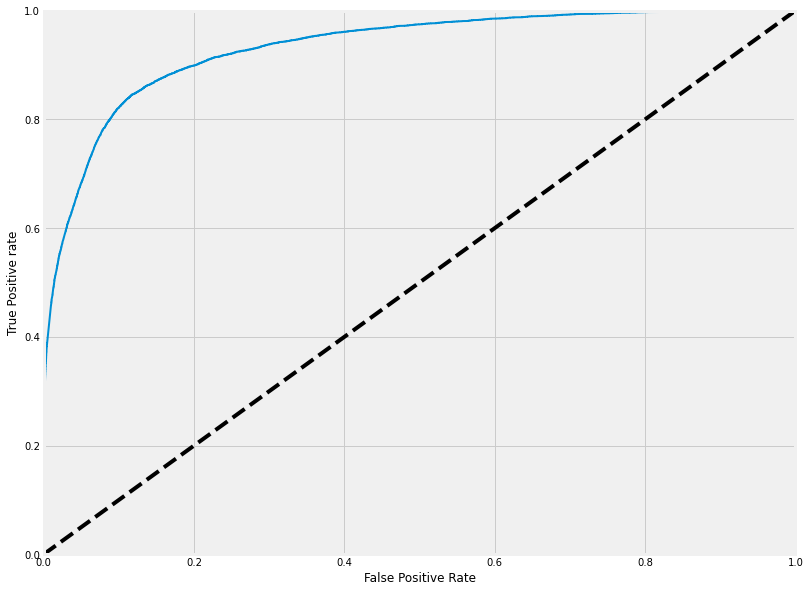

In [68]:
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(X_train,y_train)
gbc_clf_proba = gbc_clf.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
plot_roc_curve(fpr_gbc, tpr_gbc)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores)))

In [69]:
#validation
gbc_val_proba = gbc_clf.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.8529578670358112


We are overfitting! Let's try tuning the hyperparameters of our gradient boosting classifier to improve generalization.

In [70]:
gbc_clf_submission = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_clf_submission.fit(X_train,y_train)
gbc_clf_proba = gbc_clf_submission.predict_proba(X_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf_submission.predict_proba(X_val)
gbc_val_scores = gbc_val_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y_train, gbc_clf_scores)
print("AUC Score {}".format(roc_auc_score(y_train, gbc_clf_scores))), print("AUC Score {}".format(roc_auc_score(y_val, gbc_val_scores)))

AUC Score 0.8660094854908804
AUC Score 0.8561704352590861


(None, None)

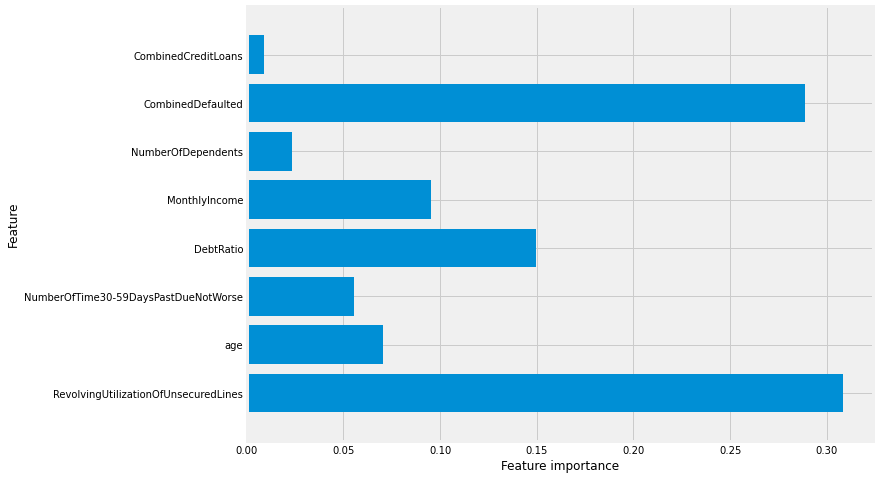

In [71]:
plot_feature_importances(gbc_clf)

Here, the GradientBoostingClassifier gives more emphasis on the RevolvingUtilizationOfUnsecuredLines feature and the DebtRatio, much more equally than the RandonForestClassifier. We're taking GradientBoostingClassifier as our model to submit on the kaggle competition.

In [72]:
X_test.shape

(101503, 8)

In [73]:
submission_proba = gbc_clf_submission.predict_proba(X_test)
submission_scores = submission_proba[:,1] #Positive Class

In [74]:
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_scores})
submission.to_csv('submission_credit.csv', index=False)